### CNN(卷积神经网络)

CNN结构<br>
卷积层：conv2d 对图像特征的提取/信息匹配<br>
非线性变换层(激活层)： relu/sigmoid/tanh <br>
池化层: pooling2d <br>
全连接层：w*x+b <br>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
 train_images = np.expand_dims(train_images, -1)

In [6]:
train_images.shape

(60000, 28, 28, 1)

In [12]:
test_images = np.expand_dims(test_images, -1)

In [13]:
test_images.shape

(10000, 28, 28, 1)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),
                                 input_shape=train_images.shape[1:],
                                 activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64, (3, 3),
                                 activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.output_shape

(None, 10)

In [10]:
model.compile(optimizer="adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4672 - acc: 0.8350 - val_loss: 0.4285 - val_acc: 0.8506
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4139 - acc: 0.8552 - val_loss: 0.4259 - val_acc: 0.8532
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3855 - acc: 0.8645 - val_loss: 0.3925 - val_acc: 0.8656
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3581 - acc: 0.8738 - val_loss: 0.4179 - val_acc: 0.8521
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - acc: 0.8783 - val_loss: 0.3964 - val_acc: 0.8633
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248 - acc: 0.8862 - val_loss: 0.3577 - val_acc: 0.8738
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - acc: 0.8894 - val_loss: 0.3414 - val_acc: 0.8830
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

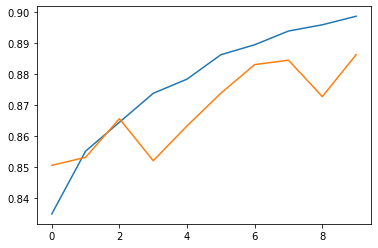

In [18]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

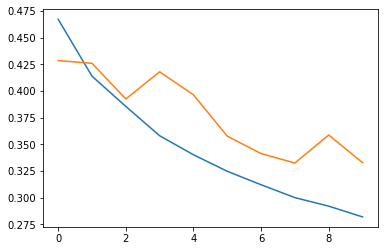

In [19]:
plt.plot(history.epoch, history.history.get('loss'))
plt.plot(history.epoch, history.history.get('val_loss'))